In [1]:
import numpy as np
import pandas as pd
import random as rd
import sys, os
import scipy.io as sio

Import and Organize Data 

In [2]:
print("Loading in matlab data - this takes ~1min and about 2gb memory")
matlab_obj = sio.loadmat('realitymining.mat')
print("Done loading matlab data.")
print('Extracting valid subjects and creating id dictionaries.')


Loading in matlab data - this takes ~1min and about 2gb memory
Done loading matlab data.
Extracting valid subjects and creating id dictionaries.


In [3]:
s = matlab_obj['s']  #takes 1-2 minutes

In [4]:
s.dtype #we see all fields of the structure, takes 2 minutes

dtype([('comm', 'O'), ('charge', 'O'), ('active', 'O'), ('logtimes', 'O'), ('on', 'O'), ('locs', 'O'), ('all_locs', 'O'), ('loc_ids', 'O'), ('device_names', 'O'), ('device_macs', 'O'), ('device_date', 'O'), ('device_list_names', 'O'), ('device_list_macs', 'O'), ('device_types', 'O'), ('device_list_types', 'O'), ('cellnames', 'O'), ('apps', 'O'), ('timeon', 'O'), ('app_dates', 'O'), ('comm_sms', 'O'), ('comm_sms_date', 'O'), ('comm_voice', 'O'), ('comm_voice_date', 'O'), ('comm_data', 'O'), ('comm_data_date', 'O'), ('surveydata', 'O'), ('my_mac', 'O'), ('my_startdate', 'O'), ('my_affil', 'O'), ('my_group', 'O'), ('my_office', 'O'), ('my_plan', 'O'), ('my_provider', 'O'), ('my_community', 'O'), ('home_ids', 'O'), ('survey_start_n', 'O'), ('mac', 'O'), ('my_minutes', 'O'), ('my_enddate', 'O'), ('my_hashedNumber', 'O'), ('places', 'O'), ('imei', 'O'), ('neighborhood', 'O'), ('my_hours', 'O'), ('my_regular', 'O'), ('my_hangouts', 'O'), ('my_predictable', 'O'), ('my_forget', 'O'), ('my_batte

In [5]:
s.size #takes 1-2 min

106

In [6]:
s.shape #takes 1-2 min

(1, 106)

In [7]:
import pickle 
print("Writting realitymining ~1min...")
filename = 'realitymining'
outfile = open(filename,'wb') #takes 1-2 mins
pickle.dump(s,outfile)
print("Done")
outfile.close()

Writting realitymining ~1min...
Done


In [8]:
filename = 'realitymining'
print("Loading realitymining ~1min...")
infile = open(filename,'rb')
print("Done")

Loading realitymining ~1min...
Done


In [9]:
print("Filling s structure ~1min...")
s = pickle.load(infile) 
print("Done")

Filling s structure ~1min...
Done


In [10]:
infile.close()
subjectID=4

In [11]:
M=s['data_mat'][0,subjectID-1].transpose() #Here we select the Matrix of Subject subjectID

In [12]:
M.shape

(180, 24)

In [13]:
#M=M[:,0:3]

Q1 How the first 3 eigenvectors for the chosen subject relate to the
behaviors seen in days 10, 15 and 20 of this subject. Do the projectionsto answer this question.

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

C:\Users\hanzh\anaconda3\envs\skmob\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


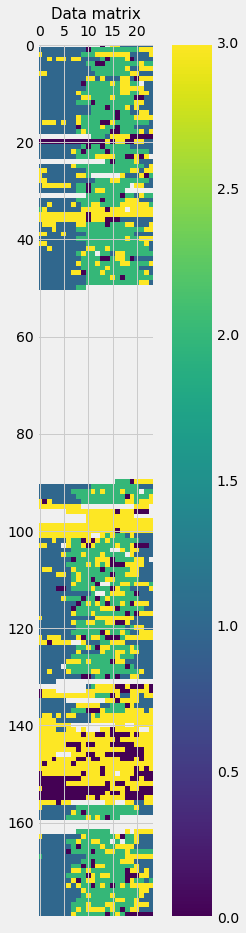

In [15]:
fig = plt.figure(figsize=(5,15))
axes = fig.add_subplot(111)
mat = axes.matshow(M)
fig.colorbar(mat)
axes.set_title('Data matrix', FontSize = 15)
#axes.set_xticks(range(24))
#axes.set_yticks(range(len(M.columns)))
plt.show()

In [20]:
hours=np.size(M,1)
days=np.size(M,0)
num_labels=5

In [21]:
Mbw=np.zeros([days,hours*num_labels])

In [22]:
Mbw

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
name_column=[]

for j in range(1,np.size(Mbw,1)+1):
    J1=hours*(num_labels-1)+1 #97=24*(5-1)+1
    if j >= J1:      
        name_column.append(str(j-J1)+'_off')
    else:
        J2=hours*(num_labels-2)+1
        if j>=J2:
            name_column.append(str(j-J2)+'_nsf')
        else:
            J3=hours*(num_labels-3)+1
            if j >= J3:
                name_column.append(str(j-J3)+'_els')
            else:
                J4=hours*(num_labels-4)+1
                if j >= J4:
                    name_column.append(str(j-J4)+'_wrk')
                else:
                    name_column.append(str(j-1)+'_hom')

In [24]:
for i in range(1,days+1):
        for j in range(1,hours+1):
            place=M[i-1][j-1]
            if np.isnan(place):
                Ji=hours*(num_labels-1)+1 #97=24*(5-1)+1
                Jf=hours*num_labels #120
                J=Ji+j-1
                Mbw[i-1][J-1]=1
            else:
                if place==0:
                    Ji=hours*(num_labels-2)+1 #73
                    Jf=hours*(num_labels-1)   #96
                    J=Ji+j-1
                    Mbw[i-1][J-1]=1
                else:
                    Ji=int(hours*(place-1)+1) # (1-24) for house and (25-48) for work 
                    Jf=int(hours*place)       # and (49-72) for elsewehere
                    J=int(Ji+j-1)
                    Mbw[i-1][J-1]=1

In [25]:
df = pd.DataFrame(data=Mbw,index=None,columns=name_column)

In [26]:
description = df.describe(percentiles=[]).T.sort_values(['mean'], ascending = False).drop(['count','min','max'], axis=1).T
description

,4_hom,3_hom,5_hom,2_hom,1_hom,0_hom,6_hom,16_wrk,12_wrk,13_wrk,...,14_hom,0_wrk,15_hom,13_hom,16_hom,2_wrk,1_wrk,3_wrk,4_wrk,5_wrk
mean,0.533333,0.527778,0.511111,0.500000,0.488889,0.477778,0.472222,0.405556,0.405556,0.394444,...,0.016667,0.011111,0.011111,0.005556,0.005556,0.0,0.0,0.0,0.0,0.0
std,0.500279,0.500620,0.501271,0.501395,0.501271,0.500899,0.500620,0.492369,0.492369,0.490094,...,0.128376,0.105114,0.105114,0.074536,0.074536,0.0,0.0,0.0,0.0,0.0
50%,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
df1 = df[['2_hom','1_hom','0_hom','0_els','0_wrk']]

In [28]:
from sklearn.decomposition import PCA
from numpy.testing import assert_array_almost_equal
pca = PCA(n_components=2)  ##Estimates the components
pca.fit(Mbw)

U, S, VT = np.linalg.svd(Mbw - Mbw.mean(0))

assert_array_almost_equal(abs(VT[:2]),abs(pca.components_)) ## Here is where we show that the sign of the PCA 
                                                            ## can + or - keeping its norm

In [29]:
Mbw_score = pca.transform(Mbw) ##Calculates the loadings or scores

Mbw_score2 = (Mbw - pca.mean_).dot(pca.components_.T)

assert_array_almost_equal(Mbw_score, Mbw_score2)

In [30]:
Mbw_pca=pca.fit_transform(Mbw)
Mbw_recons = pca.inverse_transform(Mbw_pca)
Mbw_recons2 = Mbw_pca.dot(pca.components_) + pca.mean_

assert_array_almost_equal(Mbw_recons, Mbw_recons2)

In [31]:
from sklearn.decomposition import PCA
import scipy as sp
from sklearn import decomposition

pca = PCA(2)
projected_data = pca.fit_transform(df)
MBW_recons = pca.inverse_transform(pca.fit_transform(df))

pca2 = PCA(3)
projected_data2 = pca2.fit_transform(df)
MBW_recons2 = pca2.inverse_transform(pca2.fit_transform(df))

print("The shape of the initial data is:",df.shape)
print("The shape of the projected data is:",projected_data.shape)
print("The shape of the 2nd projected data is:",projected_data2.shape)

The shape of the initial data is: (180, 120)
The shape of the projected data is: (180, 2)
The shape of the 2nd projected data is: (180, 3)


In [32]:
from sklearn.decomposition import PCA
import scipy as sp
from sklearn import decomposition
n_components = len(name_column)

pca = decomposition.PCA(n_components = len(name_column))
pca.fit(df)   #after this part we can have PCs, the eigenvalues and the explained

PCA(n_components=120)

In [33]:
PC_dictionnary = {} #this step creates a Data frames with the PCs
Principal_components_names = ['PC ' + str(i) for i in range(1,len(name_column)+1)]
for idx in range(len(Principal_components_names)):
    PC_dictionnary[Principal_components_names[idx]] = pca.components_[idx]

PC_data = pd.DataFrame(data = PC_dictionnary) 
print("The principal components of this dataset are:")

The principal components of this dataset are:


In [34]:
PC_np=PC_data.to_numpy() #we create a matrix to visualize it as in the paper

In [35]:
name_state = ['hom','wrk','els','nsa','off']

C:\Users\hanzh\anaconda3\envs\skmob\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  import sys
C:\Users\hanzh\anaconda3\envs\skmob\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\hanzh\anaconda3\envs\skmob\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


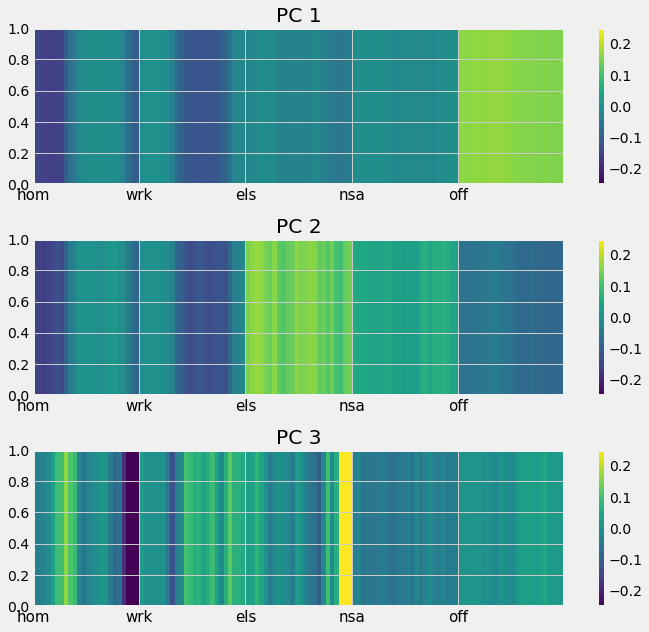

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,9))

im=ax1.imshow(np.transpose(PC_np[:,0:1]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto')
ax1.set_title('PC 1')
fig.colorbar(im, ax=ax1)
ax1.set_xticks(np.arange(0,120,24))
ax1.set_xticklabels(name_state, FontSize = 15)

im2=ax2.imshow(np.transpose(PC_np[:,1:2]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto')
ax2.set_title('PC 2')
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0,120,24))
ax2.set_xticklabels(name_state, FontSize = 15)

im3=ax3.imshow(np.transpose(PC_np[:,2:3]),vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto')
ax3.set_title('PC 3')
fig.colorbar(im3, ax=ax3)
ax3.set_xticks(np.arange(0,120,24))
ax3.set_xticklabels(name_state, FontSize = 15)

plt.tight_layout()
plt.show()

#cmap=cm.hot does not work

In [37]:
pca = PCA(3)
projected_data = pca.fit_transform(df)
MBW_recons = pca.inverse_transform(pca.fit_transform(df))

pca2 = PCA(40)
projected_data2 = pca2.fit_transform(df)
MBW_recons2 = pca2.inverse_transform(pca2.fit_transform(df))

print("The shape of the initial data is:",df.shape)
print("The shape of the projected data is:",projected_data.shape)
print("The shape of the 2nd projected data is:",projected_data2.shape)


The shape of the initial data is: (180, 120)
The shape of the projected data is: (180, 3)
The shape of the 2nd projected data is: (180, 40)


In [38]:
#add the Variables names in the Data Frame table and show them in descending value of 'PC 1'
#you can inspect the variables in descending value of any PC
PC_data['Variables'] = name_column
PC_data = PC_data.set_index(PC_data['Variables'])

PC_data['sort'] = PC_data['PC 1'].abs()
PC_data = PC_data.sort_values(['sort'], ascending = False).drop('sort', axis=1)

print("The 20 principal components of this dataset are:")
PC_data.head(60)

The 20 principal components of this dataset are:


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,Variables
Variables,,,,,,,,,,,,,,,,,,,,,
9_off,0.170723,-0.047050,0.005149,-0.020162,0.018360,0.039283,0.119504,0.005560,-0.030452,0.072810,...,-0.093545,0.046792,0.198162,-0.048268,-0.039167,-0.080506,-0.048998,-0.000867,2.081668e-16,9_off
7_off,0.169976,-0.046855,-0.007015,-0.019345,0.024210,0.065003,0.163951,0.022988,0.006376,0.071897,...,-0.023213,-0.098443,0.071333,0.064470,0.112499,-0.149564,0.008400,-0.007339,-2.842778e-16,7_off
8_off,0.169308,-0.040680,-0.016640,-0.028317,0.036145,0.052985,0.131660,-0.001742,-0.001828,0.082625,...,0.083612,-0.088683,0.004817,0.031887,0.000077,-0.013756,0.025033,-0.092733,2.550044e-16,8_off
4_off,0.168550,-0.048849,0.012427,0.033457,0.001830,0.078728,0.190831,0.000837,-0.031797,-0.038598,...,0.020167,0.057301,0.051519,-0.095978,-0.001319,-0.073242,0.099523,-0.013546,8.630249e-17,4_off
6_off,0.167787,-0.054569,0.004572,0.025349,0.013377,0.068080,0.177206,0.018440,-0.039523,0.005610,...,0.140439,0.173175,-0.021031,0.020481,-0.028519,-0.047970,-0.178260,0.013951,-2.799952e-16,6_off
10_off,0.166086,-0.062234,0.000483,-0.059762,0.013779,-0.039090,-0.050075,0.014733,0.007910,0.083080,...,0.018008,0.066879,-0.065330,-0.021089,0.096009,-0.053355,0.128988,-0.158864,-4.542807e-17,10_off
5_off,0.165783,-0.050939,-0.004215,0.030663,-0.019351,0.084755,0.200518,0.008595,-0.021185,-0.056791,...,0.140292,-0.049892,-0.020702,-0.034635,-0.084961,-0.009635,-0.068527,-0.120759,-3.146355e-16,5_off
0_off,0.164963,-0.059691,0.009525,0.024893,0.010757,0.078110,0.190604,0.000877,-0.005878,-0.027503,...,0.005279,0.087758,-0.155040,0.349962,-0.422649,-0.459062,0.290270,0.172921,9.759001e-02,0_off
1_off,0.164963,-0.059691,0.009525,0.024893,0.010757,0.078110,0.190604,0.000877,-0.005878,-0.027503,...,0.154629,-0.140197,0.046964,-0.129717,0.210545,0.202005,-0.117009,0.061888,9.759001e-02,1_off


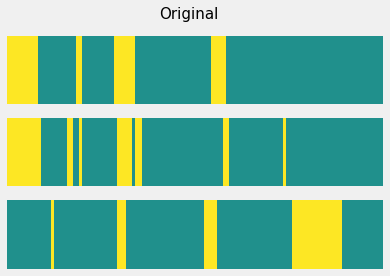

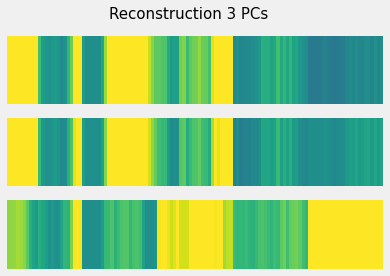

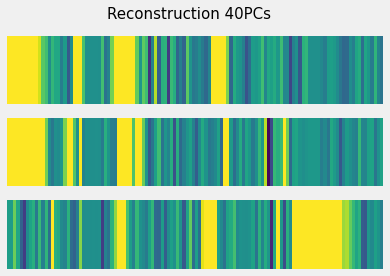

In [39]:
np.random.seed(50)
Day=np.array([10,15,20])
#plt.figure(figsize=(5,2))
#fig,ax = plt.subplots(nrows=1, figsize=(10,9))

for i in range(len(Day)):
    plt.subplot(3,1,i+1),plt.imshow(Mbw[Day[i]-1:Day[i],:],vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto')
    plt.axis('off')
plt.suptitle('Original', size=15)
plt.show()

for i in range(len(Day)):
    plt.subplot(3,1,i+1),plt.imshow(MBW_recons[Day[i]-1:Day[i],:],vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto')
    plt.axis('off')
plt.suptitle('Reconstruction 3 PCs', size=15)
plt.show()

for i in range(len(Day)):
    plt.subplot(3,1,i+1),plt.imshow(MBW_recons2[Day[i]-1:Day[i],:],vmin=-0.25,vmax=0.25,extent=[0,120,0,1], aspect='auto')
    plt.axis('off')
plt.suptitle('Reconstruction 40PCs', size=15)
plt.show()

In [40]:
Day=np.array([10,15,20])

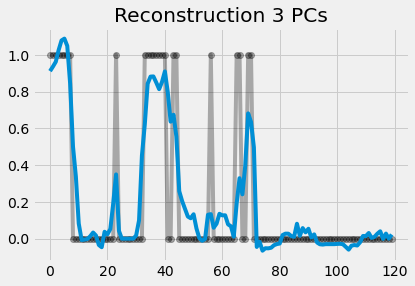

In [41]:
#10
x = np.arange(hours*num_labels)
plt.plot(x,Mbw[Day[0],:], 'o-', color='black', alpha=0.3)
plt.plot(x,MBW_recons[Day[0],:])

plt.title('Reconstruction 3 PCs')
plt.show()

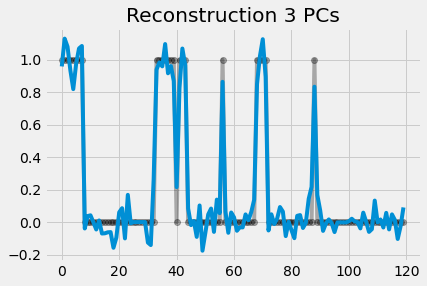

In [42]:
#15
x = np.arange(hours*num_labels)
plt.plot(x,Mbw[Day[1],:], 'o-', color='black', alpha=0.3)
plt.plot(x,MBW_recons2[Day[1],:])
plt.title('Reconstruction 3 PCs')
plt.show()

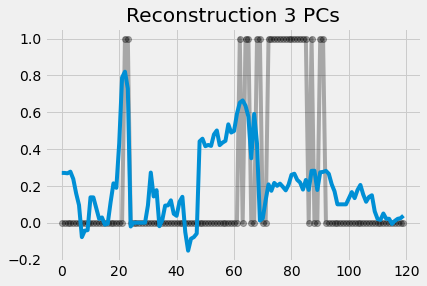

In [43]:
#20
x = np.arange(hours*num_labels)
plt.plot(x,Mbw[Day[2],:], 'o-', color='black', alpha=0.3)
plt.plot(x,MBW_recons[Day[2],:])

plt.title('Reconstruction 3 PCs')
plt.show()

In [44]:
np.transpose(PC_np[:,1:2]).shape

(1, 120)

In [45]:
#add the Variables names in the Data Frame table and show them in descending value of 'PC 1'
#you can inspect the variables in descending value of any PC
PC_data['Variables'] = name_column
PC_data = PC_data.set_index(PC_data['Variables'])

PC_data['sort'] = PC_data['PC 1'].abs()
PC_data = PC_data.sort_values(['sort'], ascending = False).drop('sort', axis=1)

print("The 20 principal components of this dataset are:")
PC_data.head(60)

The 20 principal components of this dataset are:


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,Variables
Variables,,,,,,,,,,,,,,,,,,,,,
0_hom,0.170723,-0.047050,0.005149,-0.020162,0.018360,0.039283,0.119504,0.005560,-0.030452,0.072810,...,-0.093545,0.046792,0.198162,-0.048268,-0.039167,-0.080506,-0.048998,-0.000867,2.081668e-16,0_hom
1_hom,0.169976,-0.046855,-0.007015,-0.019345,0.024210,0.065003,0.163951,0.022988,0.006376,0.071897,...,-0.023213,-0.098443,0.071333,0.064470,0.112499,-0.149564,0.008400,-0.007339,-2.842778e-16,1_hom
2_hom,0.169308,-0.040680,-0.016640,-0.028317,0.036145,0.052985,0.131660,-0.001742,-0.001828,0.082625,...,0.083612,-0.088683,0.004817,0.031887,0.000077,-0.013756,0.025033,-0.092733,2.550044e-16,2_hom
3_hom,0.168550,-0.048849,0.012427,0.033457,0.001830,0.078728,0.190831,0.000837,-0.031797,-0.038598,...,0.020167,0.057301,0.051519,-0.095978,-0.001319,-0.073242,0.099523,-0.013546,8.630249e-17,3_hom
4_hom,0.167787,-0.054569,0.004572,0.025349,0.013377,0.068080,0.177206,0.018440,-0.039523,0.005610,...,0.140439,0.173175,-0.021031,0.020481,-0.028519,-0.047970,-0.178260,0.013951,-2.799952e-16,4_hom
5_hom,0.166086,-0.062234,0.000483,-0.059762,0.013779,-0.039090,-0.050075,0.014733,0.007910,0.083080,...,0.018008,0.066879,-0.065330,-0.021089,0.096009,-0.053355,0.128988,-0.158864,-4.542807e-17,5_hom
6_hom,0.165783,-0.050939,-0.004215,0.030663,-0.019351,0.084755,0.200518,0.008595,-0.021185,-0.056791,...,0.140292,-0.049892,-0.020702,-0.034635,-0.084961,-0.009635,-0.068527,-0.120759,-3.146355e-16,6_hom
7_hom,0.164963,-0.059691,0.009525,0.024893,0.010757,0.078110,0.190604,0.000877,-0.005878,-0.027503,...,0.005279,0.087758,-0.155040,0.349962,-0.422649,-0.459062,0.290270,0.172921,9.759001e-02,7_hom
8_hom,0.164963,-0.059691,0.009525,0.024893,0.010757,0.078110,0.190604,0.000877,-0.005878,-0.027503,...,0.154629,-0.140197,0.046964,-0.129717,0.210545,0.202005,-0.117009,0.061888,9.759001e-02,8_hom


Q3 What percentage of the variance of the entire data the first 3
eigenvectors account for? How many eigenvectors do you need to
reconstruct each of the 3 sample days with more than 75% accuracy?

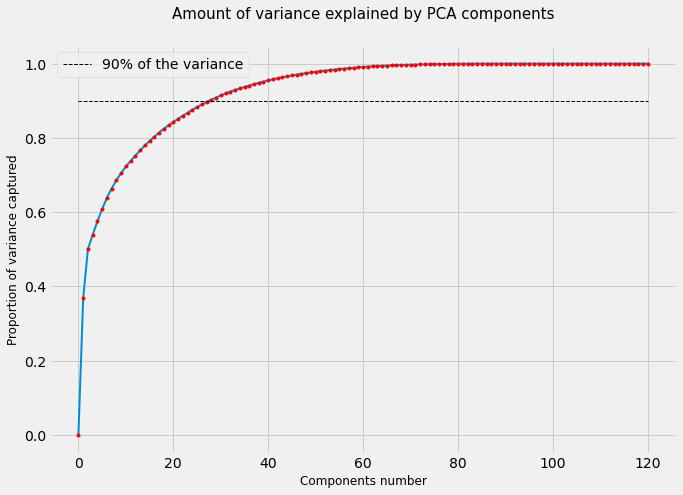

The first 3 PC capture 53.84% of the variance


In [46]:
n_components = len(name_column)

pca = PCA(n_components = n_components) #here you can do the plot with any number of n_components
pca.fit(df)
list_variance = pca.explained_variance_ratio_

plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),linewidth = 2)
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),'.',c='r',markersize = 6)
plt.plot(range(0, n_components+1),[0.9 for i in range(0, n_components+1)],'--',c = 'black',
         linewidth = 1,label="90% of the variance")
plt.legend()
plt.xlabel('Components number',fontsize = 12)
plt.ylabel('Proportion of variance captured',fontsize = 12)
plt.title('Amount of variance explained by PCA components',fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(0, 22, step=1))
ax.grid(True)
plt.show()
print("The first 3 PC capture {:.2f}%".format(100*(np.cumsum([0] + list(list_variance))[3])),"of the variance")

In [47]:
# The first three eigenvectors will count 50%, the 75% variance would be 13 eigenvectors. 

In [48]:
"""  MSE Error """
print(np.mean((Mbw - MBW_recons)**2))

0.06493525983777666


In [49]:
"""  MSE Error """
print(np.mean((Mbw - MBW_recons2)**2))

0.006383347518507484


In [50]:
print('Accuracy of 10 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[0],:]-MBW_recons[Day[0],:])))/np.sum(np.square(Mbw[Day[0],:] - np.mean(Mbw[Day[0],:])))))
print('Accuracy of 15 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[1],:]-MBW_recons[Day[1],:])))/np.sum(np.square(Mbw[Day[1],:] - np.mean(Mbw[Day[1],:])))))
print('Accuracy of 20 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[2],:]-MBW_recons[Day[2],:])))/np.sum(np.square(Mbw[Day[2],:] - np.mean(Mbw[Day[2],:])))))

Accuracy of 10 days:  0.45886493999478606
Accuracy of 15 days:  0.47100506944896314
Accuracy of 20 days:  0.02248558241605636


In [51]:
q3=PCA(25)
projected_q3=q3.fit_transform(df)
Mbw_q3=q3.inverse_transform(q3.fit_transform(df))

In [52]:
print('Accuracy of 10 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[0],:]-Mbw_q3[Day[0],:])))/np.sum(np.square(Mbw[Day[0],:] - np.mean(Mbw_q3[Day[0],:])))))
print('Accuracy of 15 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[1],:]-Mbw_q3[Day[1],:])))/np.sum(np.square(Mbw[Day[1],:] - np.mean(Mbw_q3[Day[1],:])))))
print('Accuracy of 20 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[2],:]-Mbw_q3[Day[2],:])))/np.sum(np.square(Mbw[Day[2],:] - np.mean(Mbw_q3[Day[2],:])))))

Accuracy of 10 days:  0.647929247196085
Accuracy of 15 days:  0.6482096178790684
Accuracy of 20 days:  0.6793008662002877


In [53]:
q3=PCA(30)
projected_q3=q3.fit_transform(df)
Mbw_q3=q3.inverse_transform(q3.fit_transform(df))

In [54]:
print('Accuracy of 10 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[0],:]-Mbw_q3[Day[0],:])))/np.sum(np.square(Mbw[Day[0],:] - np.mean(Mbw_q3[Day[0],:])))))
print('Accuracy of 15 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[1],:]-Mbw_q3[Day[1],:])))/np.sum(np.square(Mbw[Day[1],:] - np.mean(Mbw_q3[Day[1],:])))))
print('Accuracy of 20 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[2],:]-Mbw_q3[Day[2],:])))/np.sum(np.square(Mbw[Day[2],:] - np.mean(Mbw_q3[Day[2],:])))))

Accuracy of 10 days:  0.7619756534662352
Accuracy of 15 days:  0.6944151999389101
Accuracy of 20 days:  0.7265891098556507


In [55]:
q3=PCA(36)
projected_q3=q3.fit_transform(df)
Mbw_q3=q3.inverse_transform(q3.fit_transform(df))

In [56]:
print('Accuracy of 10 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[0],:]-Mbw_q3[Day[0],:])))/np.sum(np.square(Mbw[Day[0],:] - np.mean(Mbw_q3[Day[0],:])))))
print('Accuracy of 15 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[1],:]-Mbw_q3[Day[1],:])))/np.sum(np.square(Mbw[Day[1],:] - np.mean(Mbw_q3[Day[1],:])))))
print('Accuracy of 20 days: ',1.00-np.sqrt(np.sum(np.square((Mbw[Day[2],:]-Mbw_q3[Day[2],:])))/np.sum(np.square(Mbw[Day[2],:] - np.mean(Mbw_q3[Day[2],:])))))

Accuracy of 10 days:  0.8076179828872883
Accuracy of 15 days:  0.7621795910149315
Accuracy of 20 days:  0.7826321607966417


Difference between the distances

In [57]:
# Compute the euclidean distance using the first 2 PC

number_c=2
euclidean = np.zeros(Mbw.shape[0])

pca = PCA(n_components=number_c)  ##Estimates the components
pca.fit(Mbw)
Mbw_score = pca.transform(Mbw) ##Calculates the loadings or scores

for i in range(number_c):
    euclidean += (Mbw_score[:, i] - np.mean(Mbw_score[:,:10]))**2/np.var(Mbw_score[:,:10])

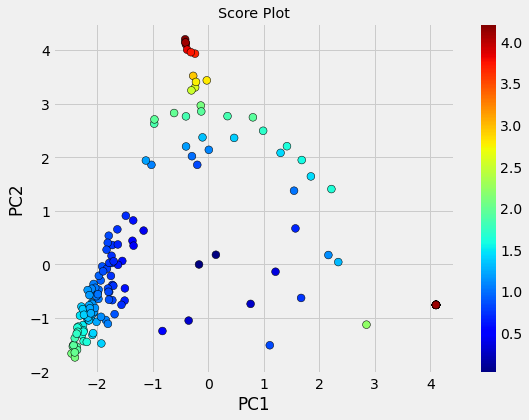

In [58]:
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
norm = mpl.colors.Normalize(vmin=min(euclidean),vmax=max(euclidean)) #for colorbar
cmap = mpl.cm.jet
fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=cmap))

with plt.style.context(('ggplot')):
    cm = colors
    plt.scatter(Mbw_score[:, 0], Mbw_score[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()

In [59]:
# Compute the euclidean distance using the 5 PC

number_c= 5
euclidean = np.zeros(Mbw.shape[0])

pca = PCA(n_components=number_c)  ##Estimates the components
pca.fit(Mbw)
Mbw_score = pca.transform(Mbw) ##Calculates the loadings or scores

for i in range(number_c):
    euclidean += (Mbw_score[:, i] - np.mean(Mbw_score[:,:10]))**2/np.var(Mbw_score[:,:10])# Compute the euclidean distance using the first 10 PC
euclidean = np.zeros(Mbw.shape[0])
for i in range(5):
    euclidean += (Mbw_score[:, 0] - np.mean(Mbw_score[:,:10]))**2/np.var(Mbw_score[:,:10])

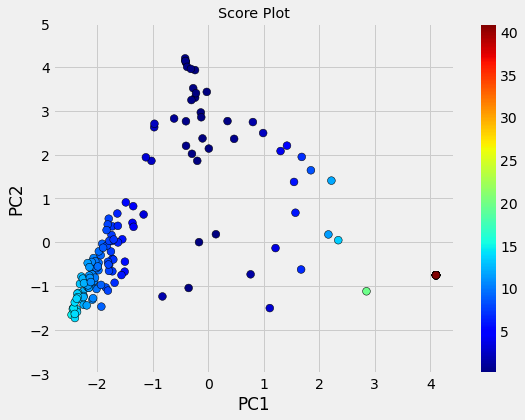

In [60]:
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
norm = mpl.colors.Normalize(vmin=min(euclidean),vmax=max(euclidean)) #for colorbar
cmap = mpl.cm.jet
fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=cmap))

with plt.style.context(('ggplot')):
    cm = colors
    plt.scatter(Mbw_score[:, 0], Mbw_score[:, 1], c=colors, edgecolors='k', s=60)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
    plt.ylim(-3,5)
plt.show()

Square distance vs numbers of clusters

In [61]:
from sklearn.cluster import KMeans
number_C=2
pca = PCA(number_C)
projected_data = pca.fit_transform(df)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected_data)
    Sum_of_squared_distances.append(km.inertia_)

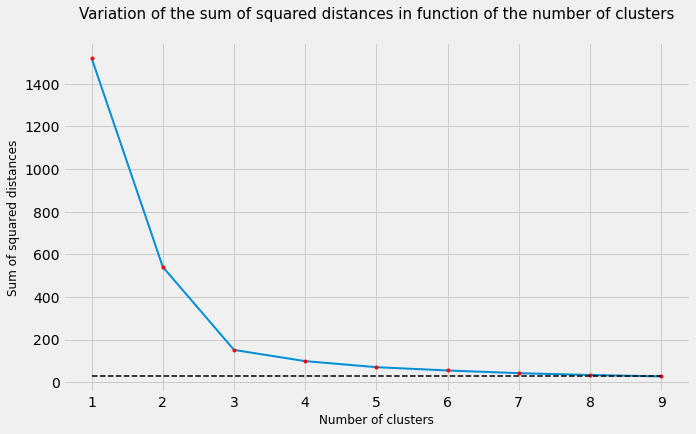

In [62]:
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)
plt.plot(K,[Sum_of_squared_distances[-1] for i in range(len(Sum_of_squared_distances))],'--',
         linewidth = 1.5, c = 'black')

plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of squared distances', fontsize = 12)
plt.title('Variation of the sum of squared distances in function of the number of clusters', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(1, 21, step=1))
ax.grid(True)
plt.show()

In [63]:
from sklearn.cluster import KMeans
number_C=5
pca = PCA(number_C)
projected_data = pca.fit_transform(df)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected_data)
    Sum_of_squared_distances.append(km.inertia_)

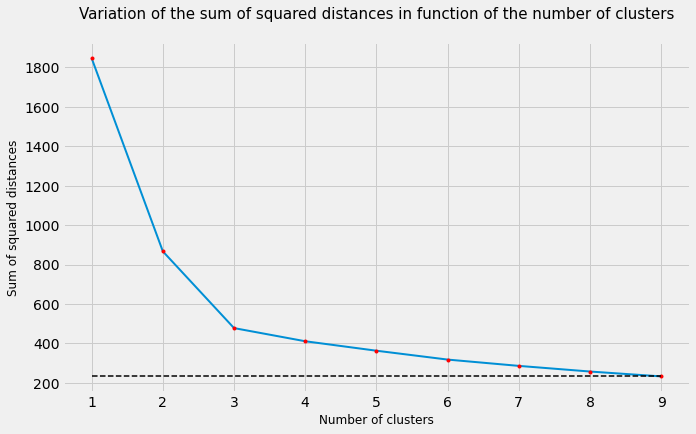

In [64]:
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)
plt.plot(K,[Sum_of_squared_distances[-1] for i in range(len(Sum_of_squared_distances))],'--',
         linewidth = 1.5, c = 'black')

plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Sum of squared distances', fontsize = 12)
plt.title('Variation of the sum of squared distances in function of the number of clusters', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(1, 21, step=1))
ax.grid(True)
plt.show()

In [65]:
pca = PCA(2)
projected_data = pca.fit_transform(df)
n_clusters = 4

In [66]:
kmeans = KMeans(n_clusters = n_clusters)


membership = kmeans.fit_predict(projected_data) #Important this can be done projecting with any number of PCs 
Score = kmeans.score(projected_data)
centers = kmeans.cluster_centers_
centers_initial_base = pca.inverse_transform(centers)

clusters_dictionnary = {}
Clusters_names = ['Cluster ' + str(i) for i in range(1,n_clusters+1)]
for idx in range(len(Clusters_names)):
    clusters_dictionnary[Clusters_names[idx]] = centers_initial_base[idx,:]
    
    
clusters_data = pd.DataFrame(data = clusters_dictionnary)
clusters_data['Variables'] = name_column
clusters_data = clusters_data.set_index(PC_data['Variables'])
del clusters_data['Variables']

clusters_data

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Variables,,,,
0_hom,0.195293,0.855690,0.011791,0.073811
1_hom,0.199079,0.876380,0.014550,0.069759
2_hom,0.201834,0.898426,0.015979,0.063768
3_hom,0.224195,0.935032,0.008109,0.117362
4_hom,0.228000,0.944073,-0.008564,0.144719
...,...,...,...,...
19_off,0.442954,0.019254,0.969066,-0.005343
20_off,0.421378,0.008664,0.952617,-0.039483
21_off,0.434189,0.030871,0.956449,-0.020191


In [67]:
pca = PCA(5)
projected_data = pca.fit_transform(df)
n_clusters = 4

In [68]:
kmeans = KMeans(n_clusters = n_clusters)


membership = kmeans.fit_predict(projected_data) #Important this can be done projecting with any number of PCs 
Score = kmeans.score(projected_data)
centers = kmeans.cluster_centers_
centers_initial_base = pca.inverse_transform(centers)

clusters_dictionnary = {}
Clusters_names = ['Cluster ' + str(i) for i in range(1,n_clusters+1)]
for idx in range(len(Clusters_names)):
    clusters_dictionnary[Clusters_names[idx]] = centers_initial_base[idx,:]
    
    
clusters_data = pd.DataFrame(data = clusters_dictionnary)
clusters_data['Variables'] = name_column
clusters_data = clusters_data.set_index(PC_data['Variables'])
del clusters_data['Variables']

clusters_data

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Variables,,,,
0_hom,0.036856,0.819665,0.065976,0.867367
1_hom,0.038507,0.864960,0.056652,0.869951
2_hom,0.042608,0.912281,0.046398,0.868998
3_hom,0.038596,0.942323,0.093333,0.910737
4_hom,0.024858,0.919631,0.118058,0.947178
...,...,...,...,...
19_off,0.929534,-0.011456,0.075130,0.062913
20_off,0.909720,0.001805,0.040788,0.033799
21_off,0.914219,0.021752,0.058389,0.058148


In [69]:
off=clusters_data[clusters_data.index.str.contains("off")]
off.sum(axis=0)
els=clusters_data[clusters_data.index.str.contains("els")]
els.sum(axis=0)
wrk=clusters_data[clusters_data.index.str.contains("wrk")]
wrk.sum(axis=0)
ns=clusters_data[clusters_data.index.str.contains("ns")]
ns.sum(axis=0)

Cluster 1    0.076227
Cluster 2    1.251878
Cluster 3    4.723134
Cluster 4    1.250925
dtype: float64

In [71]:
N = len(membership)
percentage_list = []
nb_of_people_list = []
for i in range(n_clusters):
    percentage_list.append(round(100*(membership== i).sum()/N,2))
    nb_of_people_list.append((membership == i).sum())
    print("The cluster " + str(i + 1) + " includes {:.2f}%".format(percentage_list[-1]),"of the days.")

The cluster 1 includes 26.11% of the days.
The cluster 2 includes 26.11% of the days.
The cluster 3 includes 20.00% of the days.
The cluster 4 includes 27.78% of the days.


In [72]:
number_of_features = 8
features_sorted = []
for i in range(n_clusters):
    features_sorted.append(list(clusters_data['Cluster ' + str(i+1)].sort_values(ascending = False).to_frame().head(number_of_features).index))

In [73]:
clusters_sorted = []
for i in range(n_clusters):
    clusters_sorted.append(clusters_data.loc[features_sorted[i]]['Cluster ' + str(i+1)].to_frame())

In [74]:
result = pd.concat([cluster_i for cluster_i in clusters_sorted], axis=1, sort=False).T
result.fillna(0, inplace = True)
result

,7_off,9_off,8_off,5_off,6_off,4_off,10_off,12_off,3_hom,23_hom,...,14_els,15_els,2_els,13_els,19_els,11_els,22_els,23_els,6_hom,16_wrk
Cluster 1,0.994717,0.992559,0.98773,0.979849,0.979247,0.977932,0.970917,0.970463,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster 2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.942323,0.926916,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster 3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.68215,0.667022,0.653793,0.64691,0.64609,0.644296,0.638495,0.634009,0.000000,0.000000
Cluster 4,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.910737,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.868911,0.822084


In [75]:
df.shape

(180, 120)

In [76]:
c1=[]
for x in range(len(df)):
    if membership[x] == 0:
        c1.append(x)
        
c2=[]
for x in range(len(df)):
    if membership[x] == 1:
        c2.append(x)
        
c3=[]
for x in range(len(df)):
    if membership[x] == 2:
        c3.append(x)
        
        
c4=[]
for x in range(len(df)):
    if membership[x] == 3:
        c4.append(x)

In [78]:
y0=[]
for x in range(len(c1)):
    lis=Mbw.iloc[i]
    y0.append(lis)
    
y1=[]
for x in range(len(c2)):
    lis=np.mean(Mbw[c2[x],:])
    y1.append(lis)
    
y2=[]
for x in range(len(c3)):
    lis=np.mean(Mbw[c3[x],:])
    y2.append(lis)
    
y3=[]
for x in range(len(c4)):
    lis=np.mean(Mbw[c4[x],:])
    y3.append(lis)

In [90]:
y0,y1,y2,y3

([0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2],
 [0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2],
 [0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2],
 [0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0

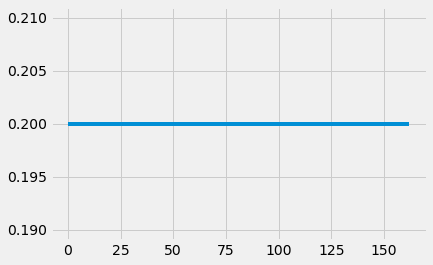

In [81]:
plt.plot(c1,y0)